In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('datasets/unemployment.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 219 entries, 0 to 218
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country Name  219 non-null    object 
 1   Country Code  219 non-null    object 
 2   2010          219 non-null    float64
 3   2011          219 non-null    float64
 4   2012          219 non-null    float64
 5   2013          219 non-null    float64
 6   2014          219 non-null    float64
dtypes: float64(5), object(2)
memory usage: 12.1+ KB


In [4]:
df.head()

,Country Name,Country Code,2010,2011,2012,2013,2014
0,Afghanistan,AFG,20.600000,20.900000,19.700001,21.100000,20.799999
1,Angola,AGO,10.800000,10.700000,10.700000,10.600000,10.500000
2,Albania,ALB,25.799999,27.000000,28.299999,28.700001,29.200001
3,Arab World,ARB,25.022214,28.117516,29.113212,29.335306,29.704569
4,United Arab Emirates,ARE,9.800000,9.800000,9.800000,9.900000,10.000000


In [5]:
df.rename(columns= {'Country Name' : 'Country', 'Country Code': 'Code'} , inplace=True)
df.head()

,Country,Code,2010,2011,2012,2013,2014
0,Afghanistan,AFG,20.600000,20.900000,19.700001,21.100000,20.799999
1,Angola,AGO,10.800000,10.700000,10.700000,10.600000,10.500000
2,Albania,ALB,25.799999,27.000000,28.299999,28.700001,29.200001
3,Arab World,ARB,25.022214,28.117516,29.113212,29.335306,29.704569
4,United Arab Emirates,ARE,9.800000,9.800000,9.800000,9.900000,10.000000


In [6]:
df.set_index('Country')

,Code,2010,2011,2012,2013,2014
Country,,,,,,
Afghanistan,AFG,20.600000,20.900000,19.700001,21.100000,20.799999
Angola,AGO,10.800000,10.700000,10.700000,10.600000,10.500000
Albania,ALB,25.799999,27.000000,28.299999,28.700001,29.200001
Arab World,ARB,25.022214,28.117516,29.113212,29.335306,29.704569
United Arab Emirates,ARE,9.800000,9.800000,9.800000,9.900000,10.000000
...,...,...,...,...,...,...
"Yemen, Rep.",YEM,30.299999,30.000000,30.200001,30.200001,29.900000
South Africa,ZAF,50.799999,50.099998,52.200001,51.400002,52.599998
"Congo, Dem. Rep.",COD,12.300000,12.300000,12.300000,12.200000,11.900000


In [7]:
df2 = pd.read_csv('datasets/unemployment2020.csv')

In [8]:
df2.columns = [col.title() for col in df2.columns.values]
df2.rename(columns={'Subject' : 'Gender', 'Value' : 'Unemployment Rate'}, inplace=True)

In [9]:
df2.drop(columns=['Indicator', 'Measure', 'Flag Codes', 'Frequency'], inplace=True)

In [10]:
df2.head(2)

,Location,Gender,Time,Unemployment Rate
0,AUS,TOT,2020-01,5.269611
1,AUS,TOT,2020-02,5.081623


In [11]:
def getUnemByCountry(month):
    return df2[df2['Month'] == month].groupby('Location').sum()

In [12]:
df2['Month'] = ""
Months = ['January','February','March','April','May','June','July','August','September','October']

month = []

for row in df2.Time:
    if row == '2020-01':
        month.append(Months[0])
    elif row == '2020-02':
        month.append(Months[1])
    elif row == '2020-03':
        month.append(Months[2])
    elif row == '2020-04':
        month.append(Months[3])
    elif row == '2020-05':
        month.append(Months[4])
    elif row == '2020-06':
        month.append(Months[5])
    elif row == '2020-07':
        month.append(Months[6])
    elif row == '2020-08':
        month.append(Months[7])
    elif row == '2020-09':
        month.append(Months[8])
    elif row == '2020-10':
        month.append(Months[9])
    else:
        month.append('Not Defined')

df2.Month = month

df2.tail(5)

,Location,Gender,Time,Unemployment Rate,Month
530,JPN,WOMEN,2020-06,2.5,June
531,JPN,WOMEN,2020-07,2.7,July
532,JPN,WOMEN,2020-08,2.9,August
533,JPN,WOMEN,2020-09,2.7,September
534,JPN,WOMEN,2020-10,2.7,October


In [13]:
df2.head(3)

,Location,Gender,Time,Unemployment Rate,Month
0,AUS,TOT,2020-01,5.269611,January
1,AUS,TOT,2020-02,5.081623,February
2,AUS,TOT,2020-03,5.220101,March


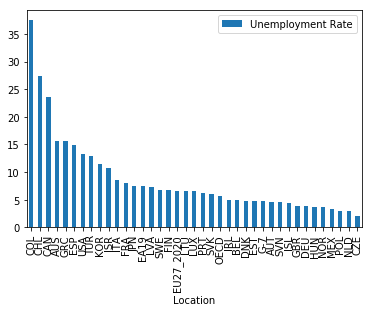

In [14]:
getUnemByCountry('March').sort_values('Unemployment Rate', ascending = False).plot(kind="bar")

In [16]:
df2.groupby('Gender').count()

,Location,Time,Unemployment Rate,Month
Gender,,,,
MEN,78,78,78,78
TOT,379,379,379,379
WOMEN,78,78,78,78


,Country,Code,2010,2011,2012,2013,2014
0,Afghanistan,AFG,20.600000,20.900000,19.700001,21.100000,20.799999
1,Angola,AGO,10.800000,10.700000,10.700000,10.600000,10.500000
2,Albania,ALB,25.799999,27.000000,28.299999,28.700001,29.200001
3,Arab World,ARB,25.022214,28.117516,29.113212,29.335306,29.704569
4,United Arab Emirates,ARE,9.800000,9.800000,9.800000,9.900000,10.000000
...,...,...,...,...,...,...,...
214,"Yemen, Rep.",YEM,30.299999,30.000000,30.200001,30.200001,29.900000
215,South Africa,ZAF,50.799999,50.099998,52.200001,51.400002,52.599998
216,"Congo, Dem. Rep.",COD,12.300000,12.300000,12.300000,12.200000,11.900000
217,Zambia,ZMB,26.400000,26.600000,26.600000,25.500000,25.100000
